In [239]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
import seaborn as sns
sns.set_style('darkgrid')

In [240]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'legacy', lib='bc03', sample='mini_mocha') 

In [241]:
meta.keys()

dict_keys(['galid', 't_lookback', 'dt', 'sfh_disk', 'sfh_bulge', 'Z_disk', 'Z_bulge', 'logM_disk', 'logM_bulge', 'logM_total', 't_age_MW', 'Z_MW', 'redshift', 'cosi', 'tau_ism', 'tau_bc', 'vd_disk', 'vd_bulge', 'logM_fiber', 'airmass', 'moon_alt', 'moon_ill', 'moon_sep', 'seeing', 'sun_alt', 'sun_sep', 'texp_total', 'transp', 'wave_sky', 'sbright_sky', 'sfr_1gyr', 'sfr_100myr'])

In [242]:
chain_data_dir = os.path.join(os.environ.get('GQPMC'),'doctor','data_list','data_retrieval')

In [243]:
fsps_data_dir = os.path.join(chain_data_dir,'fsps')
dust_data_dir = os.path.join(chain_data_dir,'fsps_complexdust')
emul_data_dir = os.path.join(chain_data_dir, 'emulator','30x')

In [244]:
emul_specphoto_sfr = np.load(os.path.join(emul_data_dir,'lgal.specphoto.noise_bgs0_legacy.emulator.postproc.median.npy'), allow_pickle = True)[()]

In [74]:
meta_logsfr1gyr = np.log10(meta['sfr_1gyr'])[:97]

/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [75]:
inferred_sfr = np.array(emul_specphoto_sfr['logsfr.1gyr'])
mask = inferred_sfr != 'N/A'
inferred_sfr = inferred_sfr[mask].astype(float)
meta_logsfr1gyr = meta_logsfr1gyr[mask]

In [187]:
arr = np.arange(96)
new_arr = np.delete(arr,[19,33,64])
print(new_arr[0],new_arr[17],new_arr[32],new_arr[92])

0 17 34 95


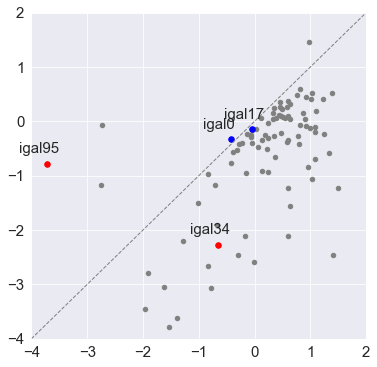

In [262]:
plt.figure(figsize=(6,6))
plt.scatter(meta_logsfr1gyr,inferred_sfr, c = 'gray', s = 20)
plt.scatter(meta_logsfr1gyr[0],inferred_sfr[0], c = 'blue',s = 30)
plt.text(meta_logsfr1gyr[0]-.5,inferred_sfr[0]+.2,s = 'igal0',fontsize= 15)
plt.scatter(meta_logsfr1gyr[17],inferred_sfr[17], c = 'blue', s = 30) #17
plt.text(meta_logsfr1gyr[17]-.5,inferred_sfr[17]+.2,s = 'igal17',fontsize= 15)
plt.text(meta_logsfr1gyr[92]-.5,inferred_sfr[92]+.2,s = 'igal95',fontsize= 15)
plt.text(meta_logsfr1gyr[32]-.5,inferred_sfr[32]+.2,s = 'igal34',fontsize= 15)
plt.scatter(meta_logsfr1gyr[92],inferred_sfr[92], c = 'red', s = 30) #95
plt.scatter(meta_logsfr1gyr[32],inferred_sfr[32], c = 'red', s = 30) #34
plt.ylim(plt.xlim(-4,2))
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.plot([-4,2],[-4,2], ls = '--', color = 'gray', lw = 1)
plt.show()
plt.close()

### beta 1-4 is the theta_med from postproc files

In [9]:
beta1 = np.array(emul_specphoto_sfr['beta1_sfh'])
beta2 = np.array(emul_specphoto_sfr['beta2_sfh'])
beta3 = np.array(emul_specphoto_sfr['beta3_sfh'])
beta4 = np.array(emul_specphoto_sfr['beta4_sfh'])

### Get SFH bases from Fitters object

In [10]:
dummy = Fitters.iSpeculator()

In [155]:
# t_lookback = dummy._nmf_t_lookback
base1 = dummy._sfh_basis[0]
base2 = dummy._sfh_basis[1]
base3 = dummy._sfh_basis[2]
base4 = dummy._sfh_basis[3]

#### Example plot of the SFH bases

#### The plot is slightly different from the paper

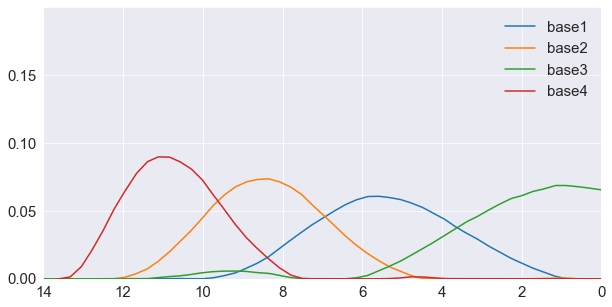

In [260]:
plt.figure(figsize = (10,5))
plt.plot(t_lookback,base1(13.6-t_lookback), label = 'base1')
plt.plot(t_lookback,base2(13.6-t_lookback), label = 'base2')
plt.plot(t_lookback,base3(13.6-t_lookback), label = 'base3')
plt.plot(t_lookback,base4(13.6-t_lookback), label = 'base4')
plt.legend(frameon = False, loc = 'upper right', fontsize = 15)
plt.xlim(t_lookback.min(),t_lookback.max())
plt.ylim(0,0.2)
plt.yticks([0,0.05,0.1,0.15],fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().invert_xaxis()
plt.show()

In [143]:
meta['sfh_bulge']

[<Column name='sfh_bulge' dtype='float64' length=13>
 21596413.023643803
  82188524.80383722
 170.78827454967282
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0, <Column name='sfh_bulge' dtype='float64' length=15>
                0.0
                0.0
 115967701.57190895
  2878373.869294335
 379.28938244571304
  213.5848909048252
 109.62983238184611
  54.90631109720809
  31.00758582935794
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0, <Column name='sfh_bulge' dtype='float64' length=15>
                0.0
   905288965.355439
 1218428091.0299523
 1817599906.1546876
 10595816.063189175
 182652.38132478294
  1383.075519407732
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
 

#### Get true SFH vs t_lookback. Normalize the SFH

In [206]:
len(meta['dt'][1])

15

In [202]:
print(len(meta['dt']))

100


In [197]:
print(np.sum(meta['sfh_disk'][0]+meta['sfh_bulge'][0]))
print(10**meta['logM_total'][0])

5597186810.865435
5597186810.865433


In [210]:
norm_sfh = []
meta_t_lookback = []
i=0
for sfh_disk, sfh_bulge, logm,meta_t_lb,meta_dt in zip(meta['sfh_disk'][:97],
                                               meta['sfh_bulge'][:97],
                                               meta['logM_total'][:97],
                                               meta['t_lookback'][:97],
                                               meta['dt'][:97]):
    norm_sfh.append(np.divide((sfh_disk+sfh_bulge)/(10**logm),meta_dt))
    meta_t_lookback.append(meta_t_lb)
    i+=1

print(len(norm_sfh))

97


In [118]:
igal_t_lookback = meta['t_lookback']

#### Not perfectly normalized

In [145]:
float(beta1[0])+float(beta2[0])+float(beta3[0])+float(beta4[0])

0.9477235340961242

0.5893694411629152 0.17134065351521824 0.10724664824197838 0.07976679117601235


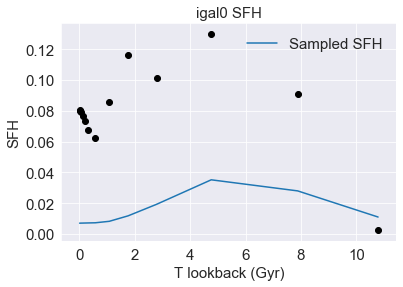

0.6958440391999691 0.2088675023663817 0.0022358854294665313 0.031136979938419324


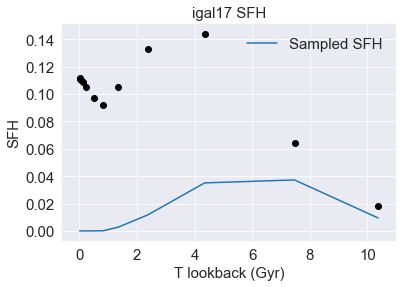

0.006886052470853943 0.9715471511185912 3.370474820479095e-05 0.007904250610486585


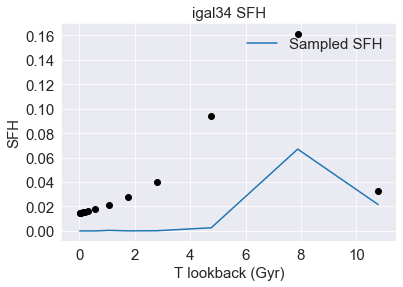

3.333528469862124e-05 0.9985595163547354 4.719723681906328e-06 0.0012257600511204536


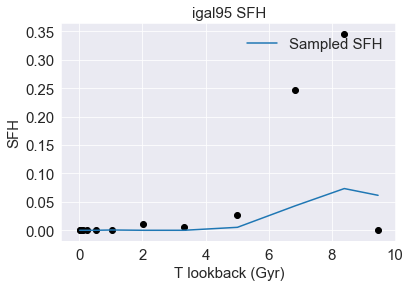

In [259]:
for igal in range(97):
    t_lb = igal_t_lookback[igal]
    igal_base1 = base1(13.6-t_lb)
    igal_base2 = base2(13.6-t_lb)
    igal_base3 = base3(13.6-t_lb)
    igal_base4 = base4(13.6-t_lb)
    if beta1[igal] == 'N/A':
        continue
    elif igal == 0 or igal == 17 or igal == 95 or igal == 34:
        plt.title(f'igal{igal} SFH', fontsize = 15)
        plt.plot(t_lb, float(beta1[igal]) * igal_base1 + float(beta2[igal]) * igal_base2 + float(beta3[igal]) * igal_base3 + float(beta4[igal]) * igal_base4, label = 'Sampled SFH')
        plt.scatter(meta_t_lookback[igal],norm_sfh[igal], c = 'k')
        plt.ylabel('SFH', fontsize = 15)
        plt.xlabel('T lookback (Gyr)', fontsize = 15)
#         plt.gca().invert_xaxis()
        plt.legend(loc = 'upper right', frameon = False, fontsize = 15)
        print(beta1[igal],beta2[igal],beta3[igal],beta4[igal])
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.show()